In [129]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as sc

In [130]:
path1 = 'C:\\Users\\ADMIN\\Downloads\\geoMap1.csv'
path2 = 'C:\\Users\\ADMIN\\Downloads\\geoMap2.csv'

In [131]:
data1 = pd.read_csv(path1, header=1)
data2 = pd.read_csv(path2, header=1)

In [132]:
data1

,Region,مهاجرت در ایران: (8/8/21 - 8/8/22)
0,Tehran,100.0
1,Khuzestan,99.0
2,Alborz,97.0
3,Fars,88.0
4,Isfahan,87.0
5,Khorasan Razavi,81.0
6,East Azerbaijan,80.0
7,Qazvin,NaN
8,Chaharmahal and Bakhtiari,NaN
9,Kermanshah,NaN


In [133]:
data2

,Region,خشکسالی: (8/8/21 - 8/8/22)
0,Ilam,100
1,Hamadan,92
2,Kermanshah,79
3,Lorestan,79
4,Isfahan,66
5,Semnan,58
6,Ardabil,58
7,Kurdistan,57
8,Zanjan,54
9,Khuzestan,53


In [134]:
ind = data1.Region
data1 = data1.drop(['Region'], axis=1)
val = data1.values
data1 = pd.DataFrame(val, index=ind, columns=['migration'])
data1

,migration
Region,
Tehran,100.0
Khuzestan,99.0
Alborz,97.0
Fars,88.0
Isfahan,87.0
Khorasan Razavi,81.0
East Azerbaijan,80.0
Qazvin,NaN
Chaharmahal and Bakhtiari,NaN


In [135]:
data1.migration['Tehran']

100.0

In [136]:
ind = data2.Region
data2 = data2.drop(['Region'], axis=1)
val = data2.values
data2 = pd.DataFrame(val, index=ind, columns=['water_crisis'])
data2

,water_crisis
Region,
Ilam,100
Hamadan,92
Kermanshah,79
Lorestan,79
Isfahan,66
Semnan,58
Ardabil,58
Kurdistan,57
Zanjan,54


In [137]:
data2['migration'] = 0
for i in data2.index:
    data2['migration'][i] = data1.migration[i]
data2

,water_crisis,migration
Region,,
Ilam,100,NaN
Hamadan,92,NaN
Kermanshah,79,NaN
Lorestan,79,NaN
Isfahan,66,87.0
Semnan,58,NaN
Ardabil,58,NaN
Kurdistan,57,NaN
Zanjan,54,NaN


East azerbaijan, khorasan razavi,fars

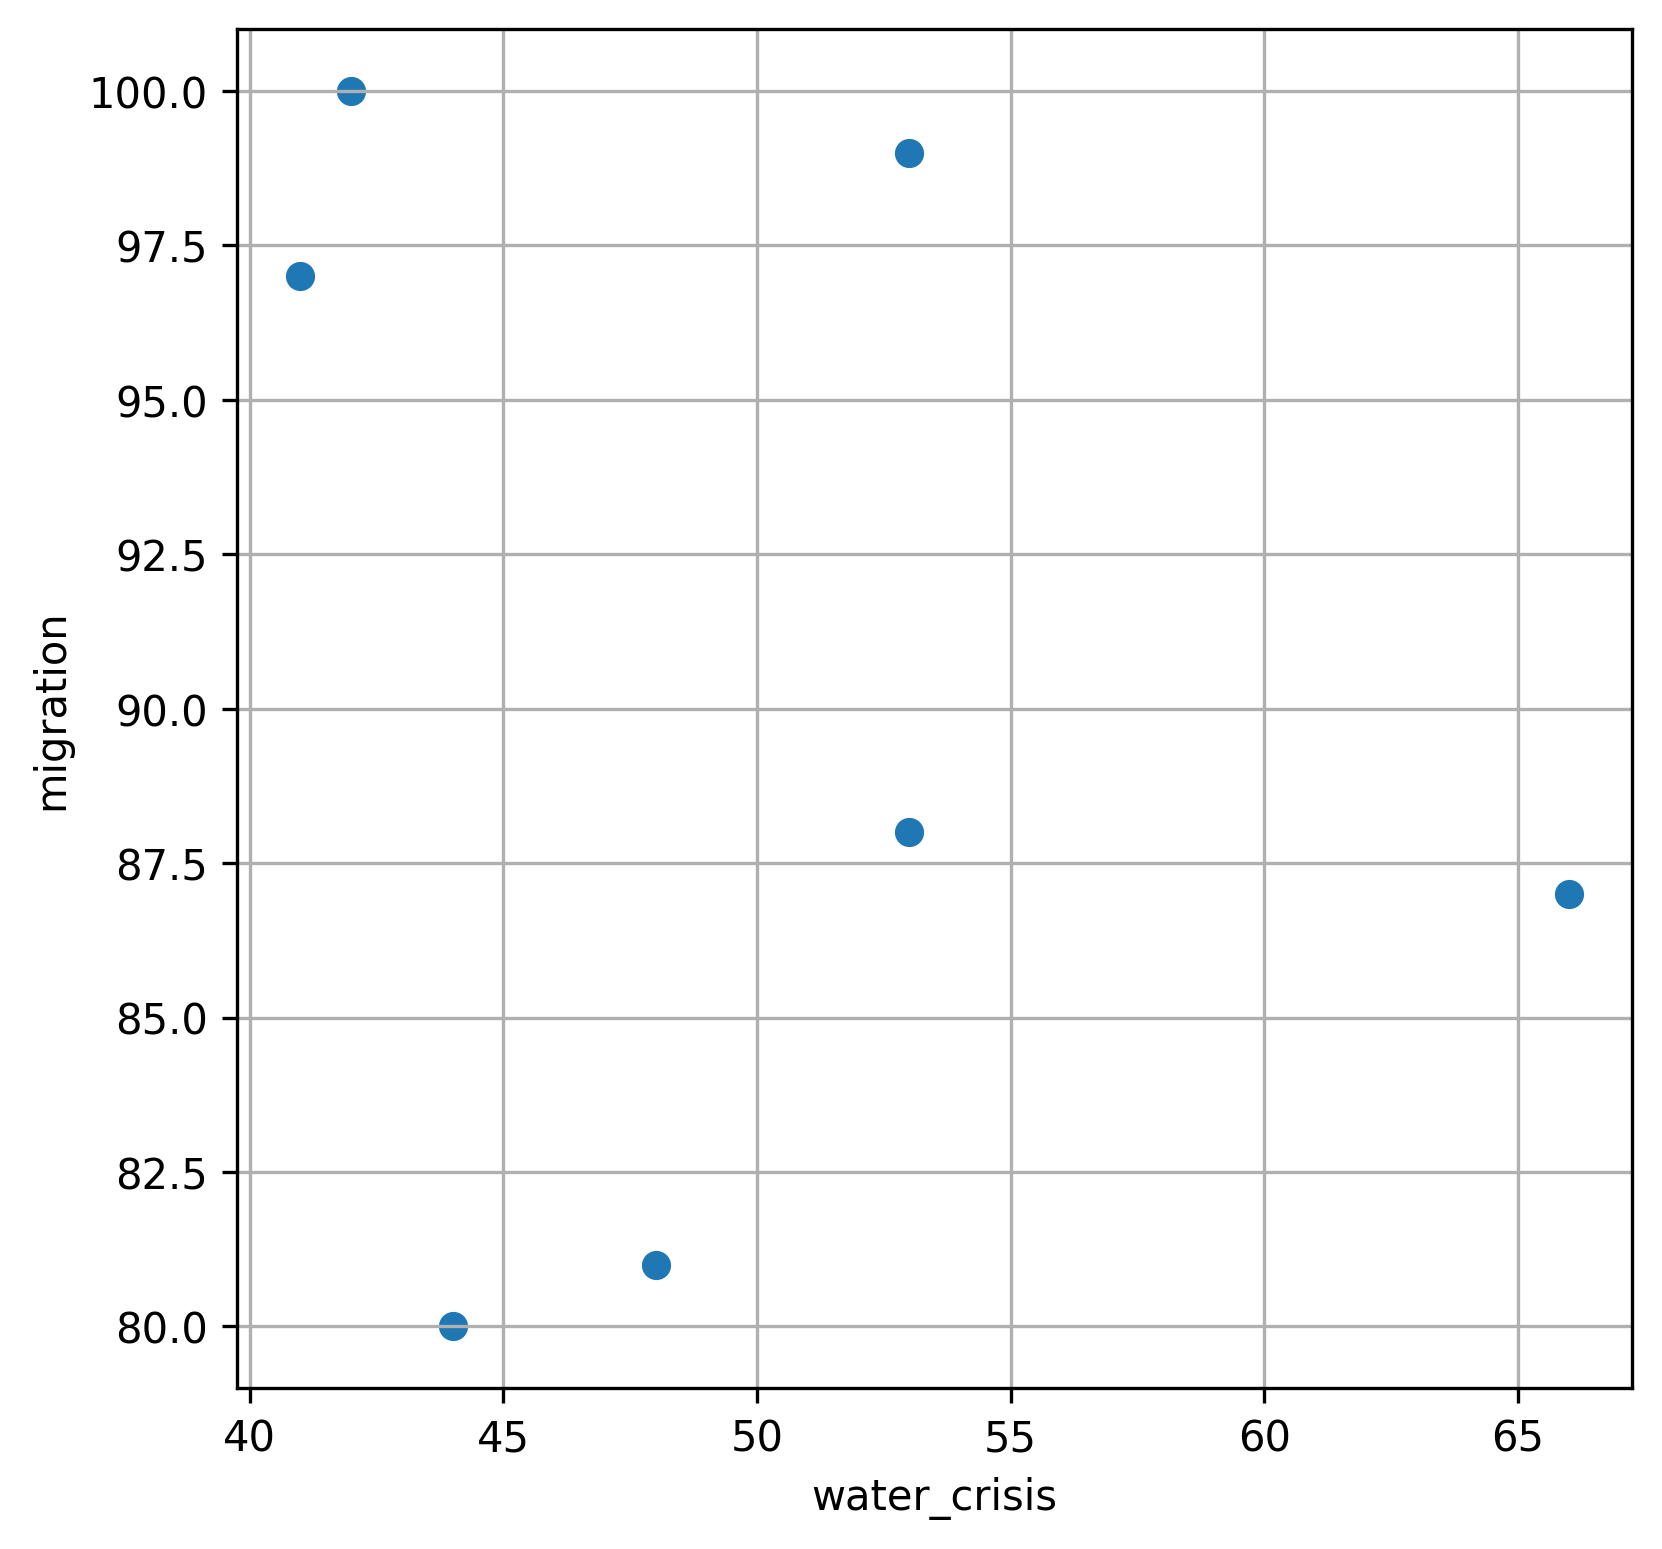

In [138]:
plt.figure(figsize=(6, 6), dpi=300)
plt.scatter(data2.water_crisis, data2.migration)
plt.xlabel('water_crisis')
plt.ylabel('migration')
plt.grid()
plt.show()

In [139]:
'East Azerbaijan', 'Khorasan Razavi', 'Fars'

('East Azerbaijan', 'Khorasan Razavi', 'Fars')

In [140]:
data3 = pd.DataFrame([], index=['migration', 'water_crisis'])
data3['East_Azerbaijan'] = data2.loc['East Azerbaijan'][:]
data3['Khorasan_Razavi'] = data2.loc['Khorasan Razavi'][:]
data3['Fars'] = data2.loc['Fars'][:]

In [141]:
data3

,East_Azerbaijan,Khorasan_Razavi,Fars
migration,80.0,81.0,88.0
water_crisis,44.0,48.0,53.0


In [142]:
data2

,water_crisis,migration
Region,,
Ilam,100,NaN
Hamadan,92,NaN
Kermanshah,79,NaN
Lorestan,79,NaN
Isfahan,66,87.0
Semnan,58,NaN
Ardabil,58,NaN
Kurdistan,57,NaN
Zanjan,54,NaN


In [143]:
data4 = pd.DataFrame([], index=['East Azerbaijan', 'Khorasan Razavi', 'Fars'], columns=['migration', 'water_crisis'])
for i in ['East Azerbaijan', 'Khorasan Razavi', 'Fars']:
    data4['migration'][i] = data2['migration'][i]
    data4['water_crisis'][i] = data2['water_crisis'][i]
data4

,migration,water_crisis
East Azerbaijan,80.0,44
Khorasan Razavi,81.0,48
Fars,88.0,53


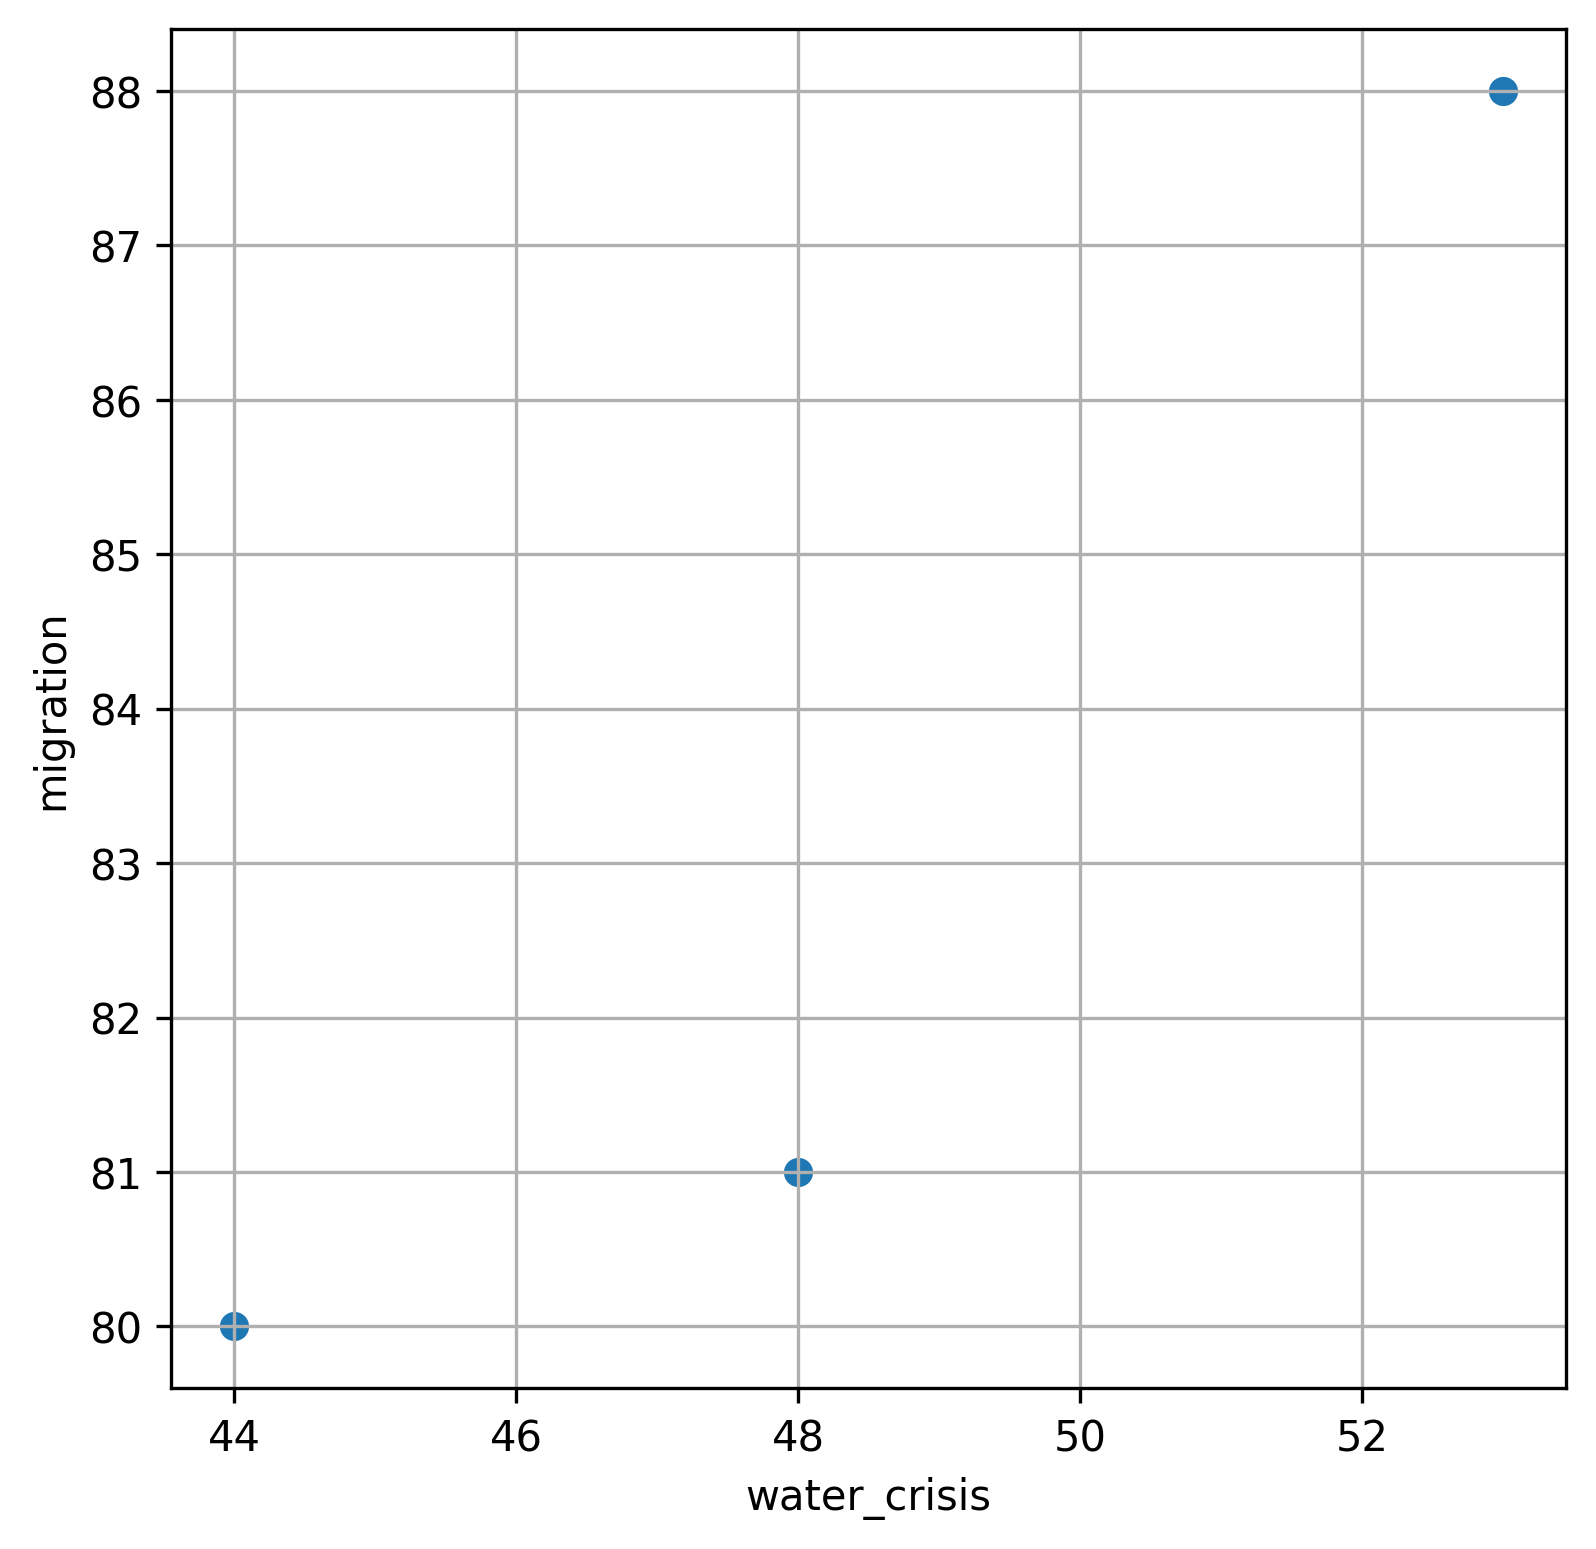

In [144]:
plt.figure(figsize=(6, 6), dpi=300)
plt.scatter(data4.water_crisis, data4.migration)
plt.xlabel('water_crisis')
plt.ylabel('migration')
plt.grid()
plt.show()

In [146]:
sc.pearsonr(data4.water_crisis,data4.migration)

PearsonRResult(statistic=0.9412188965466886, pvalue=0.21936364375617148)